# Build MTH5 from USGS Geomagnetic data

Its common to look at observatory data for geomagnetic storms or to use as a remote reference.  The USGS provides geomagnetic observatory data for observatories in North America.  In the future this will be expanded to the various other observatories using well developed packages like [geomagpy](https://pypi.org/project/geomagpy/). 

You will need to know ahead of time what observatories you would like to download data from, dates, and type of data.  There are no wildcards.  See [USGS Geomagnetic webservices](https://www.usgs.gov/tools/web-service-geomagnetism-data) for more information on allowed options.

Here we will download 2 days of data from 2 different observatories for the x and y components of calibrated data ('adjusted').

In [1]:
import pandas as pd

from mth5.clients import MakeMTH5

2023-06-29 16:36:01,709 [line 141] mth5.setup_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\logs\mth5_debug.log




## Create a request DataFrame

The request input is in the form of a `pandas.DataFrame` with the following columns

| Column | Description | Options |
|--------|-------------|---------|
| observatory | Observatory code | BDT, BOU, TST, BRW, BRT, BSL, CMO, CMT, DED, DHT, FRD, FRN, GUA, HON, NEW, SHU, SIT, SJG, TUC,  USGS, BLC, BRD, CBB, EUA, FCC, IQA, MEA, OTT, RES, SNK, STJ, VIC, YKC, HAD, HER, KAK|
| type | The type of data to download | variation, adjusted, quasi-definitive, definitivevariation, adjusted (*default*), quasi-definitive, definitive |
| elements | Components or elements of the geomagnetic data to download, should be a list| D, DIST, DST, E, E-E, E-N, F, G, H, SQ, SV, UK1, UK2, UK3, UK4, X, Y, ZD, DIST, DST, E, E-E, E-N, F, G, H, SQ, SV, UK1, UK2, UK3, UK4, X, Y, Z |
| sampling_period | Sampling period of data to download in seconds | 1, 60, 3600 |
| start | Start time (YYYY-MM-DDThh:mm:ss)  in UTC time| |
| end | End time (YYYY-MM-DDThh:mm:ss) in UTC time||

In [5]:
request_df = (
    pd.DataFrame(
        {
            "observatory": ["frn"] * 4,
            "type": ["adjusted"] * 4,
            "elements": [["x", "y"]] * 4,
            "sampling_period": [1] * 4,
            "start": [
                "2021-04-26T00:00:00",
                "2021-05-18T00:00:00",
                "2022-07-08T00:00:00",
                "2022-10-27T00:00:00",
            ],
            "end": [
                "2021-05-06T00:00:00",
                "2021-05-27T00:00:00",
                "2022-07-15T00:00:00",
                "2022-11-05T00:00:00",
            ],
        }
    )
)

In [6]:
request_df

,observatory,type,elements,sampling_period,start,end
0,frn,adjusted,"[x, y]",1,2021-04-26T00:00:00,2021-05-06T00:00:00
1,frn,adjusted,"[x, y]",1,2021-05-18T00:00:00,2021-05-27T00:00:00
2,frn,adjusted,"[x, y]",1,2022-07-08T00:00:00,2022-07-15T00:00:00
3,frn,adjusted,"[x, y]",1,2022-10-27T00:00:00,2022-11-05T00:00:00


### Adding Run ID

When the request is input automatically run names will be assigned to different windows of time by `f"sp{sampling_period}_{count:03}"`. So the first run is `sp1_001`, alternatively you can add a run column and name them as you like.  

## Create MTH5

Once the request is complete get the data. The file name will be created automatically as `usgs_geomag_{list of observatories}_{list of elements}.h5`

In [7]:
make_mth5_object = MakeMTH5(
    mth5_version="0.2.0",
    interact=True,
    save_path=r"c:\Users\jpeacock\OneDrive - DOI\MTData\CL2021",
)
mth5_object = make_mth5_object.from_usgs_geomag(request_df)

2023-06-29 16:39:44,713 [line 673] mth5.mth5.MTH5._initialize_file - INFO: Initialized MTH5 0.2.0 file c:\Users\jpeacock\OneDrive - DOI\MTData\CL2021\usgs_geomag_frn_xy.h5 in mode a
2023-06-29 16:40:09,307 [line 658] mth5.timeseries.run_ts.RunTS.validate_metadata - WARNING: end time of dataset 2021-05-06T00:00:04+00:00 does not match metadata end 2021-05-06T00:00:00+00:00 updating metatdata value to 2021-05-06T00:00:04+00:00
2023-06-29 16:40:31,352 [line 658] mth5.timeseries.run_ts.RunTS.validate_metadata - WARNING: end time of dataset 2021-05-27T00:00:04+00:00 does not match metadata end 2021-05-27T00:00:00+00:00 updating metatdata value to 2021-05-27T00:00:04+00:00
2023-06-29 16:40:31,401 [line 313] mth5.groups.base.MasterStation.add_station - INFO: Station Fresno already exists, returning existing group.
2023-06-29 16:40:48,921 [line 658] mth5.timeseries.run_ts.RunTS.validate_metadata - WARNING: end time of dataset 2022-07-15T00:00:03+00:00 does not match metadata end 2022-07-15T00:

### Check to make sure everything was downloaded properly

In [8]:
mth5_object.channel_summary.summarize()
mth5_object.channel_summary.to_dataframe()

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,USGS-GEOMAG,Fresno,sp1_001,37.091,-119.718,331.0,hx,2021-04-26 00:00:00+00:00,2021-05-06 00:00:04+00:00,864005,1.0,magnetic,0.0,0.0,nanotesla,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,USGS-GEOMAG,Fresno,sp1_001,37.091,-119.718,331.0,hy,2021-04-26 00:00:00+00:00,2021-05-06 00:00:04+00:00,864005,1.0,magnetic,90.0,0.0,nanotesla,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
2,USGS-GEOMAG,Fresno,sp1_002,37.091,-119.718,331.0,hx,2021-05-18 00:00:00+00:00,2021-05-27 00:00:04+00:00,777605,1.0,magnetic,0.0,0.0,nanotesla,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
3,USGS-GEOMAG,Fresno,sp1_002,37.091,-119.718,331.0,hy,2021-05-18 00:00:00+00:00,2021-05-27 00:00:04+00:00,777605,1.0,magnetic,90.0,0.0,nanotesla,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
4,USGS-GEOMAG,Fresno,sp1_003,37.091,-119.718,331.0,hx,2022-07-08 00:00:00+00:00,2022-07-15 00:00:03+00:00,604804,1.0,magnetic,0.0,0.0,nanotesla,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
5,USGS-GEOMAG,Fresno,sp1_003,37.091,-119.718,331.0,hy,2022-07-08 00:00:00+00:00,2022-07-15 00:00:03+00:00,604804,1.0,magnetic,90.0,0.0,nanotesla,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
6,USGS-GEOMAG,Fresno,sp1_004,37.091,-119.718,331.0,hx,2022-10-27 00:00:00+00:00,2022-11-05 00:00:04+00:00,777605,1.0,magnetic,0.0,0.0,nanotesla,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
7,USGS-GEOMAG,Fresno,sp1_004,37.091,-119.718,331.0,hy,2022-10-27 00:00:00+00:00,2022-11-05 00:00:04+00:00,777605,1.0,magnetic,90.0,0.0,nanotesla,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


### Have a look at a run

In [9]:
run = mth5_object.get_run("Fresno", "sp1_001", "USGS-GEOMAG")

In [10]:
hx = run.get_channel("hx")

In [11]:
hx.hdf5_dataset[0:100]

array([22579.81 , 22579.796, 22579.769, 22579.767, 22579.761, 22579.713,
       22579.696, 22579.694, 22579.669, 22579.647, 22579.602, 22579.574,
       22579.568, 22579.556, 22579.541, 22579.539, 22579.511, 22579.501,
       22579.479, 22579.466, 22579.471, 22579.428, 22579.414, 22579.405,
       22579.377, 22579.385, 22579.372, 22579.328, 22579.32 , 22579.293,
       22579.276, 22579.249, 22579.221, 22579.185, 22579.168, 22579.155,
       22579.124, 22579.127, 22579.104, 22579.075, 22579.062, 22579.025,
       22579.027, 22579.027, 22578.99 , 22578.997, 22578.976, 22578.972,
       22578.944, 22578.934, 22578.926, 22578.925, 22578.925, 22578.917,
       22578.892, 22578.873, 22578.844, 22578.795, 22578.757, 22578.714,
       22578.672, 22578.621, 22578.585, 22578.558, 22578.526, 22578.5  ,
       22578.486, 22578.489, 22578.47 , 22578.468, 22578.473, 22578.5  ,
       22578.489, 22578.505, 22578.515, 22578.531, 22578.52 , 22578.518,
       22578.505, 22578.485, 22578.513, 22578.463, 

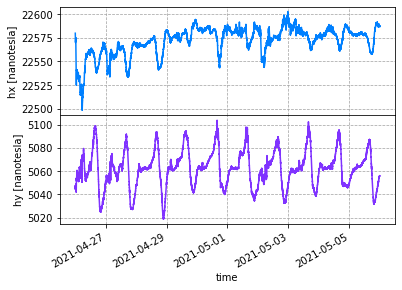

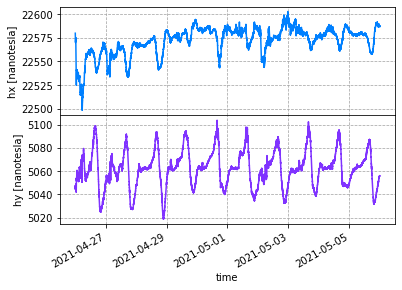

In [12]:
run_ts = run.to_runts()
run_ts.plot()

## Close the MTH5 file

**IMPORTANT**: Be sure to close the file, otherwise bad things can happen.

In [13]:
mth5_object.close_mth5()

2023-06-29 16:41:41,959 [line 754] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing c:\Users\jpeacock\OneDrive - DOI\MTData\CL2021\usgs_geomag_frn_xy.h5
